# 4.Fine-tuning keras models

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import pandas as pd
import numpy as np

C:\Users\daeky\AppData\Local\Continuum\anaconda3\envs\tensor\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
titanic_df = pd.read_csv("./data/titanic_all_numeric.csv")

In [9]:
predictors = titanic_df.iloc[:800,1:].as_matrix()
target = to_categorical(titanic_df.iloc[:800,:].survived)
test_data = titanic_df.iloc[800:,1:].as_matrix()
test_target = to_categorical(titanic_df.iloc[800:,:].survived)

## 4.1 Changing optimization Parameters

In [10]:
def get_new_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(10,)))
    model.add(Dense(2, activation='softmax'))
    return model    

In [19]:
# Import the SGD optimizer
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score
    
# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.1, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr = lr)
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer = my_optimizer)
    
    # Fit the model
    model.fit(predictors, target, epochs=10)
    
    predictions = model.predict(test_data)
    predicted_prob_true = np.round(predictions[:,1] > 0.5 )
    print("Model Accuracy %2.4f" % accuracy_score(test_target[:,1], predicted_prob_true))




Testing model with learning rate: 0.000001

Epoch 1/10
800/800 [==============================] - 1s 752us/step - loss: 1.6207
Epoch 2/10
800/800 [==============================] - 0s 166us/step - loss: 1.6193
Epoch 3/10
800/800 [==============================] - 0s 149us/step - loss: 1.6179
Epoch 4/10
800/800 [==============================] - 0s 150us/step - loss: 1.6165
Epoch 5/10
800/800 [==============================] - 0s 157us/step - loss: 1.6152
Epoch 6/10
800/800 [==============================] - 0s 151us/step - loss: 1.6138
Epoch 7/10
800/800 [==============================] - 0s 136us/step - loss: 1.6125
Epoch 8/10
800/800 [==============================] - 0s 142us/step - loss: 1.6112
Epoch 9/10
800/800 [==============================] - 0s 150us/step - loss: 1.6098
Epoch 10/10
800/800 [==============================] - 0s 148us/step - loss: 1.6085
Model Accuracy 0.7473


Testing model with learning rate: 0.100000

Epoch 1/10
800/800 [==============================] - 1

## 4.2 Early Stopping and Validation Datasets

In [21]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, epochs=10, validation_split=0.3)

Train on 560 samples, validate on 240 samples
Epoch 1/10
560/560 [==============================] - 1s 1ms/step - loss: 0.9306 - acc: 0.6304 - val_loss: 0.6169 - val_acc: 0.7042
Epoch 2/10
560/560 [==============================] - 0s 252us/step - loss: 0.6863 - acc: 0.6321 - val_loss: 0.5685 - val_acc: 0.7375
Epoch 3/10
560/560 [==============================] - 0s 248us/step - loss: 0.6492 - acc: 0.6589 - val_loss: 0.5702 - val_acc: 0.7333
Epoch 4/10
560/560 [==============================] - 0s 198us/step - loss: 0.6240 - acc: 0.6750 - val_loss: 0.5138 - val_acc: 0.7542
Epoch 5/10
560/560 [==============================] - 0s 205us/step - loss: 0.6589 - acc: 0.6679 - val_loss: 0.5412 - val_acc: 0.7292
Epoch 6/10
560/560 [==============================] - 0s 186us/step - loss: 0.7185 - acc: 0.6411 - val_loss: 0.5158 - val_acc: 0.7583
Epoch 7/10
560/560 [==============================] - 0s 182us/step - loss: 0.6785 - acc: 0.6893 - val_loss: 0.6550 - val_acc: 0.6625
Epoch 8/10
560/560

In [33]:
def get_new_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(10,)))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model    

In [36]:
# Define early_stopping_monitor
from keras.callbacks import EarlyStopping

model = get_new_model()
early_stopping_monitor = EarlyStopping(patience=3)
model.fit(predictors, target, epochs=30, callbacks=[early_stopping_monitor], validation_split=0.3)

Train on 560 samples, validate on 240 samples
Epoch 1/30
560/560 [==============================] - 1s 2ms/step - loss: 1.8775 - acc: 0.4625 - val_loss: 0.9371 - val_acc: 0.6583
Epoch 2/30
560/560 [==============================] - 0s 221us/step - loss: 0.7902 - acc: 0.6429 - val_loss: 0.5704 - val_acc: 0.7375
Epoch 3/30
560/560 [==============================] - 0s 196us/step - loss: 0.6912 - acc: 0.6482 - val_loss: 0.5450 - val_acc: 0.7500
Epoch 4/30
560/560 [==============================] - 0s 195us/step - loss: 0.6273 - acc: 0.6464 - val_loss: 0.5303 - val_acc: 0.7417
Epoch 5/30
560/560 [==============================] - 0s 211us/step - loss: 0.6151 - acc: 0.6643 - val_loss: 0.5296 - val_acc: 0.7375
Epoch 6/30
560/560 [==============================] - 0s 207us/step - loss: 0.5998 - acc: 0.6696 - val_loss: 0.5198 - val_acc: 0.7500
Epoch 7/30
560/560 [==============================] - 0s 209us/step - loss: 0.5851 - acc: 0.6750 - val_loss: 0.5108 - val_acc: 0.7542
Epoch 8/30
560/560

## 4.3 Experimenting with wider networks

In [52]:
early_stopping_monitor = EarlyStopping(patience=3)

In [53]:
def get_model_10nodes():
    model = Sequential()

    # Add the first and second layers
    model.add(Dense(10, activation='relu', input_shape=input_shape))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [54]:
def get_model_100nodes():
    model = Sequential()

    # Add the first and second layers
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [55]:
# Fit model_1
model_1_training = get_model_10nodes().fit(predictors, 
                                           target, epochs=15, 
                                           validation_split=0.2, 
                                           callbacks=[early_stopping_monitor], 
                                           verbose=False)

In [56]:
# Fit model_2
model_2_training = get_model_100nodes().fit(predictors, 
                                          target, 
                                          epochs=15, 
                                          validation_split=0.2, 
                                          callbacks=[early_stopping_monitor], 
                                          verbose=False)

In [57]:
import matplotlib.pyplot as plt

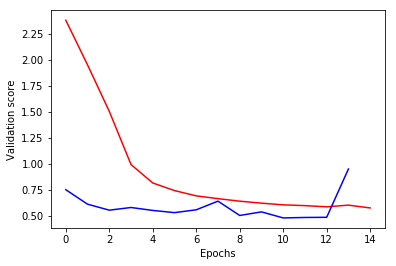

In [58]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

## 4.4 Adding layers to a network

In [59]:
def get_model_2layers():
    model = Sequential()

    # Add the first and second layers
    model.add(Dense(50, activation='relu', input_shape=input_shape))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [60]:
def get_model_3layers():
    model = Sequential()

    # Add the first and second layers
    model.add(Dense(50, activation='relu', input_shape=input_shape))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [62]:
# Fit model 1
model_1_training = get_model_2layers().fit(predictors, target, 
                                           epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

In [63]:
# Fit model 1
model_2_training = get_model_3layers().fit(predictors, target, 
                                           epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

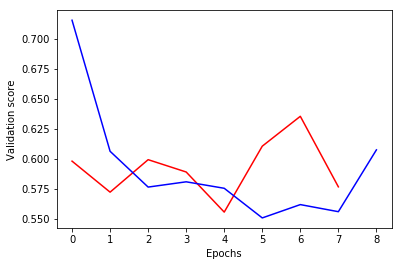

In [64]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()